In [1]:
library(IRdisplay)
library(phsstyles)
library(ggplot2)
library(survival)

In [2]:
#devtools::document('../eavehelpers')
devtools::load_all('../eavehelpers')

ℹ Loading eavehelpers

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.8-40. For overview type 'help("mgcv-package")'.

tidymv will be deprecated. Users are recommended
    to check out the in-progress replacement tidygam
    (https://github.com/stefanocoretta/tidygam).




In [16]:
modelA.ORs <- readRDS("results/FINAL/modelA_gamFit_OR.rds")
#fix these labels
modelA.ORs <- modelA.ORs %>% mutate(level = case_when(
                                                var=='n_risk_gps' & level=='3' ~ '3-4',
                                                var=='n_risk_gps' & level=='4' ~ '5+',
                                                TRUE ~ level),
                                    level = gsub("AZ","ChAdOx1",level),
                                    level = gsub("Pfizer","BNT162b2 ",level),
                                    level = gsub("Moderna","mRNA-1273",level))

In [17]:
eavehelpers::display_ratios_table(modelA.ORs) %>%
  as.character() %>%
  display_html()

var,label,level,uORs,ORs
cat,Vaccine Dose,<b>Two doses of BNT162b2 /mRNA-1273 (ref)</b>,-,-
cat,,One dose ChAdOx1,33.34 (26.96 - 41.22),35.02 (26.21 - 46.79)
cat,,One dose BNT162b2 /mRNA-1273,6.31 (5.03 - 7.92),12.49 (9.37 - 16.65)
cat,,Two doses of ChAdOx1,12.38 (10.06 - 15.24),9.95 (7.83 - 12.63)
cat,,Mixed 3+ doses (including ChAdOx1),0.60 (0.40 - 0.89),1.56 (0.81 - 3.02)
cat,,Mixed 3+ doses (no ChAdOx1),0.34 (0.20 - 0.60),0.91 (0.43 - 1.92)
ch_resident,Care Home Resident,<b>No (ref)</b>,-,-
ch_resident,,Yes,1.76 (1.17 - 2.63),1.04 (0.64 - 1.67)
immuno,Immunosuppressed,<b>No (ref)</b>,-,-
immuno,,Yes,1.56 (1.36 - 1.80),1.31 (1.11 - 1.55)


Warning message in geom_pointrange(aes(y = Nominal, ymin = LCL, ymax = UCL, fill = !!sym(fill_var), :
“Ignoring unknown parameters: `width`”


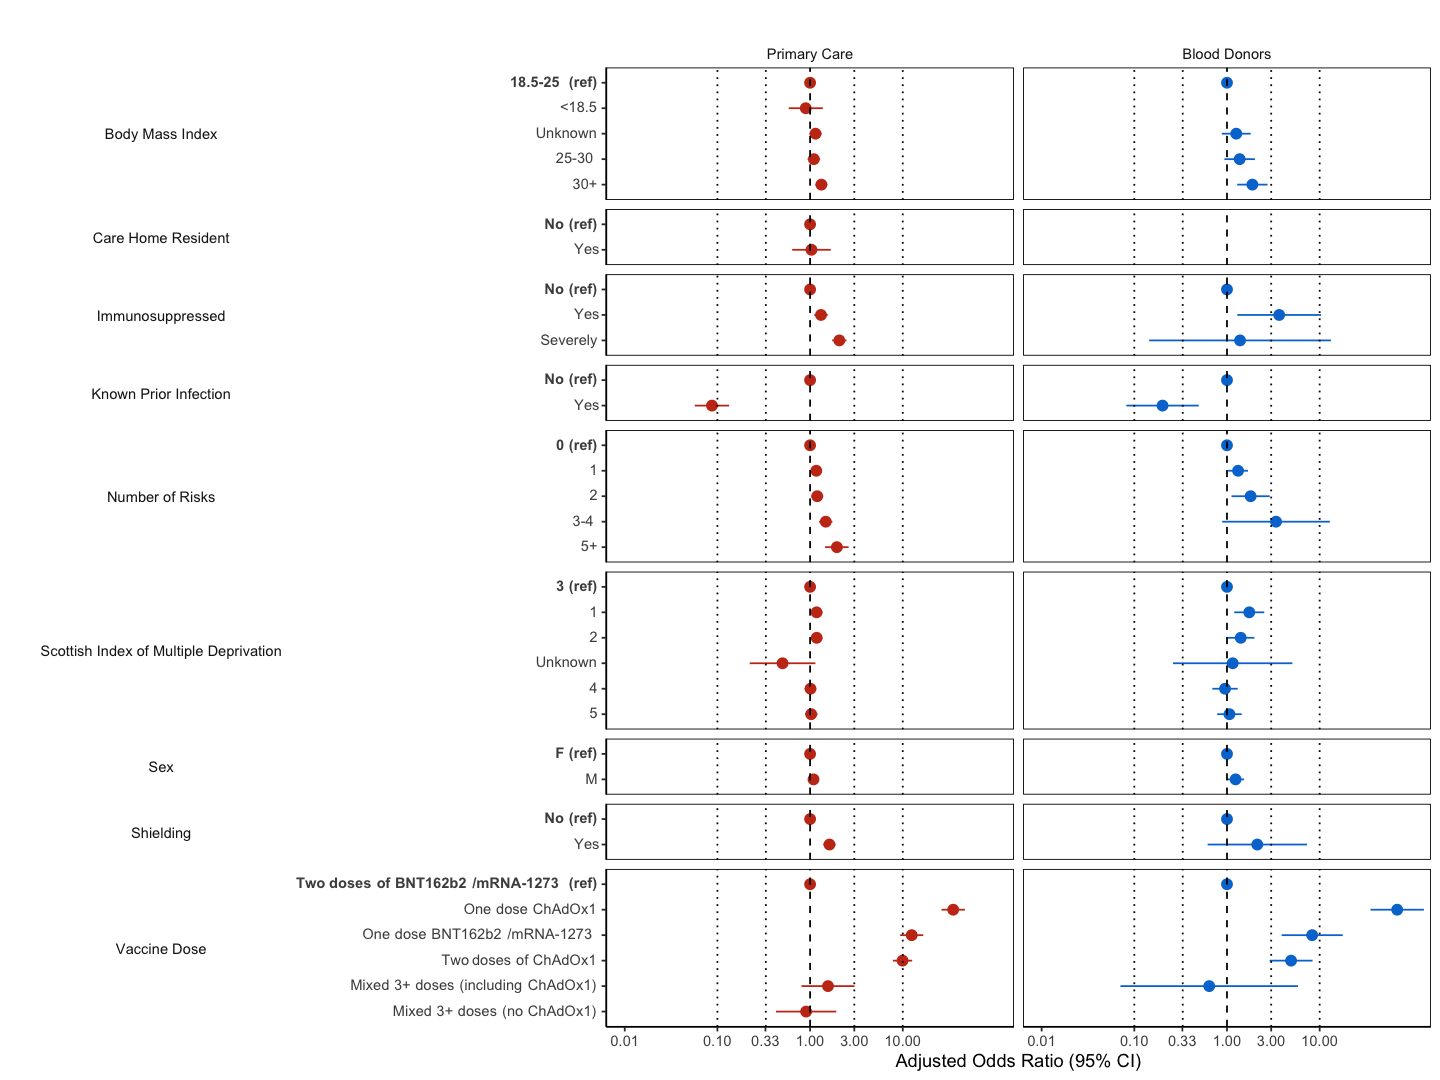

In [18]:
options(repr.plot.width=12, repr.plot.height=9)
p.modelA.ORs <- eavehelpers::plot_ratios(modelA.ORs,
                                               fill=cohort,
                                               xtitle='Adjusted Odds Ratio (95% CI)',
                                               facet=as.factor(label) ~ fct_rev(as.factor(cohort))
                                               ) 
p.modelA.ORs

In [6]:
ggsave("modelA_ORs.pdf", p.modelA.ORs , width=12, height=9, dpi=300, units="in")

Warning message in geom_pointrange(aes(y = Nominal, ymin = LCL, ymax = UCL, fill = !!sym(fill_var), :
“Ignoring unknown parameters: `width`”


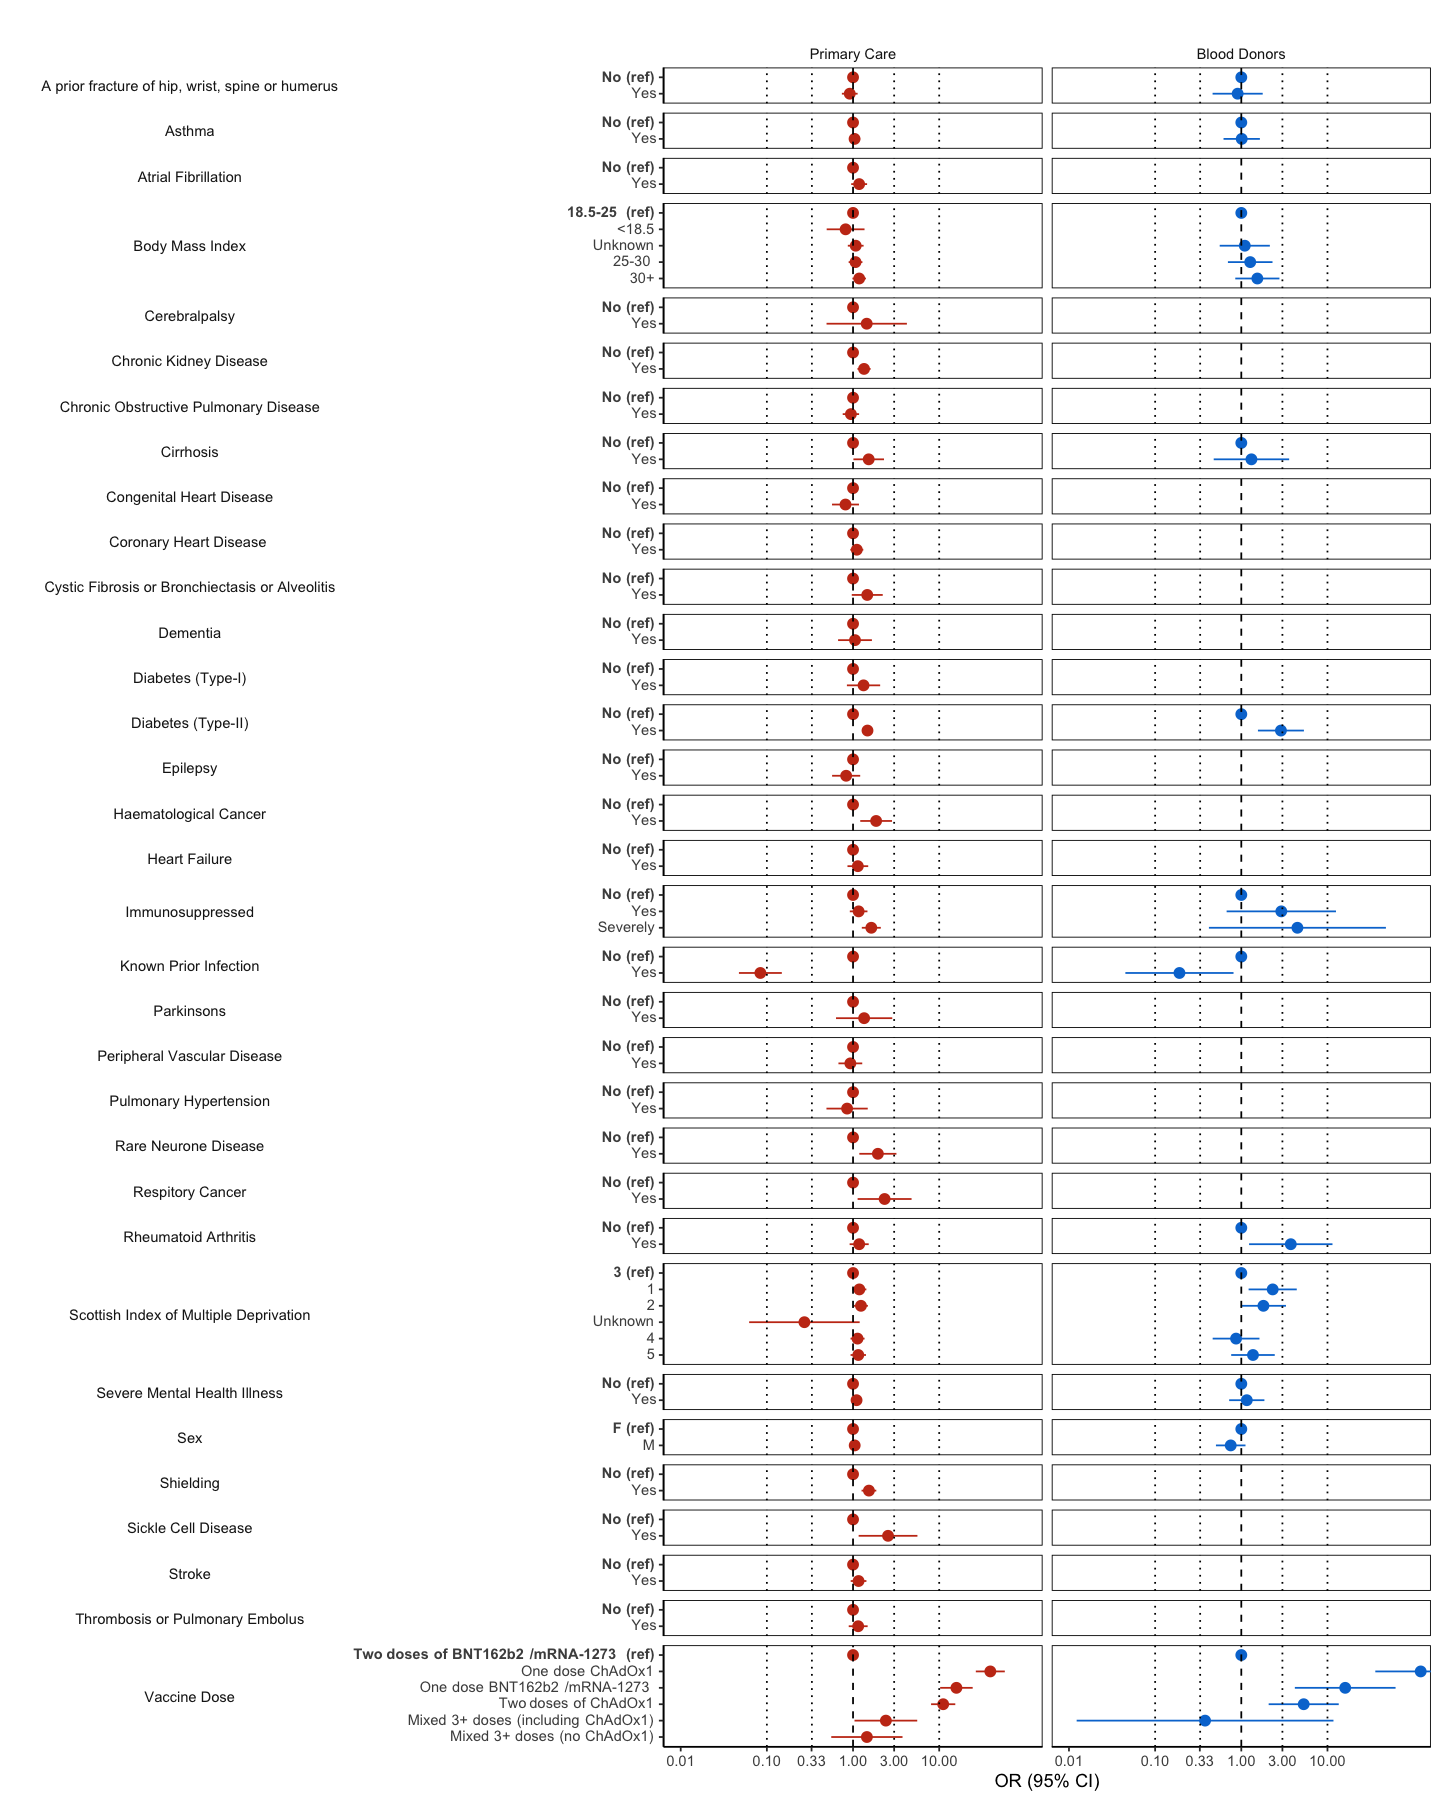

In [26]:
modelB.ORs <- readRDS("results/FINAL/modelB_gamFit_OR.rds") %>%
              mutate(
                    label = gsub("Blood","Haematological",label),
                    level = gsub("AZ","ChAdOx1",level),
                    level = gsub("Pfizer","BNT162b2 ",level),
                    level = gsub("Moderna","mRNA-1273",level))

options(repr.plot.width=12, repr.plot.height=15)
p.modelB.ORs <- eavehelpers::plot_ratios(modelB.ORs,
                                               fill=cohort,
                                               facet=as.factor(label) ~ fct_rev(as.factor(cohort))
                                               ) 
ggsave("modelB_ORs_v2.pdf", p.modelB.ORs , width=12, height=15, dpi=300, units="in")
p.modelB.ORs

In [27]:
modelB.ORs2 <- modelB.ORs %>% mutate(level=ifelse(grepl("Q_DIAG",names) & level=='Yes',label,level),
                      label=ifelse(grepl("Q_DIAG",names),'Risk Group',label))
modelB.ORs2[modelB.ORs2$label=='Risk Group' & modelB.ORs2$pos==2,]  <- modelB.ORs2[modelB.ORs2$label=='Risk Group' & modelB.ORs2$pos==2,] %>% mutate(pos=row_number()+1)
modelB.ORs2

names,Nominal,pv,se,LCL,UCL,var,level,label,uOR,uLCL,uUCL,pos,cohort
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
catTwo doses of Pfizer/Moderna,1.00000000,NA,NA,1.0000000,1.0000000,cat,<b>Two doses of BNT162b2 /mRNA-1273 (ref)</b>,Vaccine Dose,NA,NA,NA,1,Primary Care
catOne dose AZ,39.18806171,6.551349e-77,0.19763054,26.6018847,57.7291496,cat,One dose ChAdOx1,Vaccine Dose,31.08709522,23.01890319,41.9832119,2,Primary Care
catOne dose Pfizer/Moderna,15.83895587,1.331732e-35,0.22181584,10.2540733,24.4656457,cat,One dose BNT162b2 /mRNA-1273,Vaccine Dose,10.41647358,7.56025144,14.3517610,3,Primary Care
catTwo doses of AZ,11.12169639,2.974801e-48,0.16503735,8.0477781,15.3697244,cat,Two doses of ChAdOx1,Vaccine Dose,11.88075781,8.85045564,15.9486033,4,Primary Care
catMixed 3+ doses (including AZ),2.40471485,4.009612e-02,0.42744035,1.0403677,5.5582785,cat,Mixed 3+ doses (including ChAdOx1),Vaccine Dose,0.63690097,0.39183875,1.0352290,5,Primary Care
catMixed 3+ doses (no AZ),1.44787669,4.462072e-01,0.48585030,0.5586386,3.7525997,cat,Mixed 3+ doses (no ChAdOx1),Vaccine Dose,0.39431627,0.19296212,0.8057816,6,Primary Care
immunoNo,1.00000000,NA,NA,1.0000000,1.0000000,immuno,<b>No (ref)</b>,Immunosuppressed,NA,NA,NA,1,Primary Care
immunoYes,1.16117032,2.139838e-01,0.12024636,0.9173417,1.4698084,immuno,Yes,Immunosuppressed,1.25684100,1.04896676,1.5059098,2,Primary Care
immunoSeverely,1.62949046,1.626848e-04,0.12948429,1.2642205,2.1002975,immuno,Severely,Immunosuppressed,2.08540221,1.75470140,2.4784287,3,Primary Care


Warning message in geom_pointrange(aes(y = Nominal, ymin = LCL, ymax = UCL, fill = !!sym(fill_var), :
“Ignoring unknown parameters: `width`”


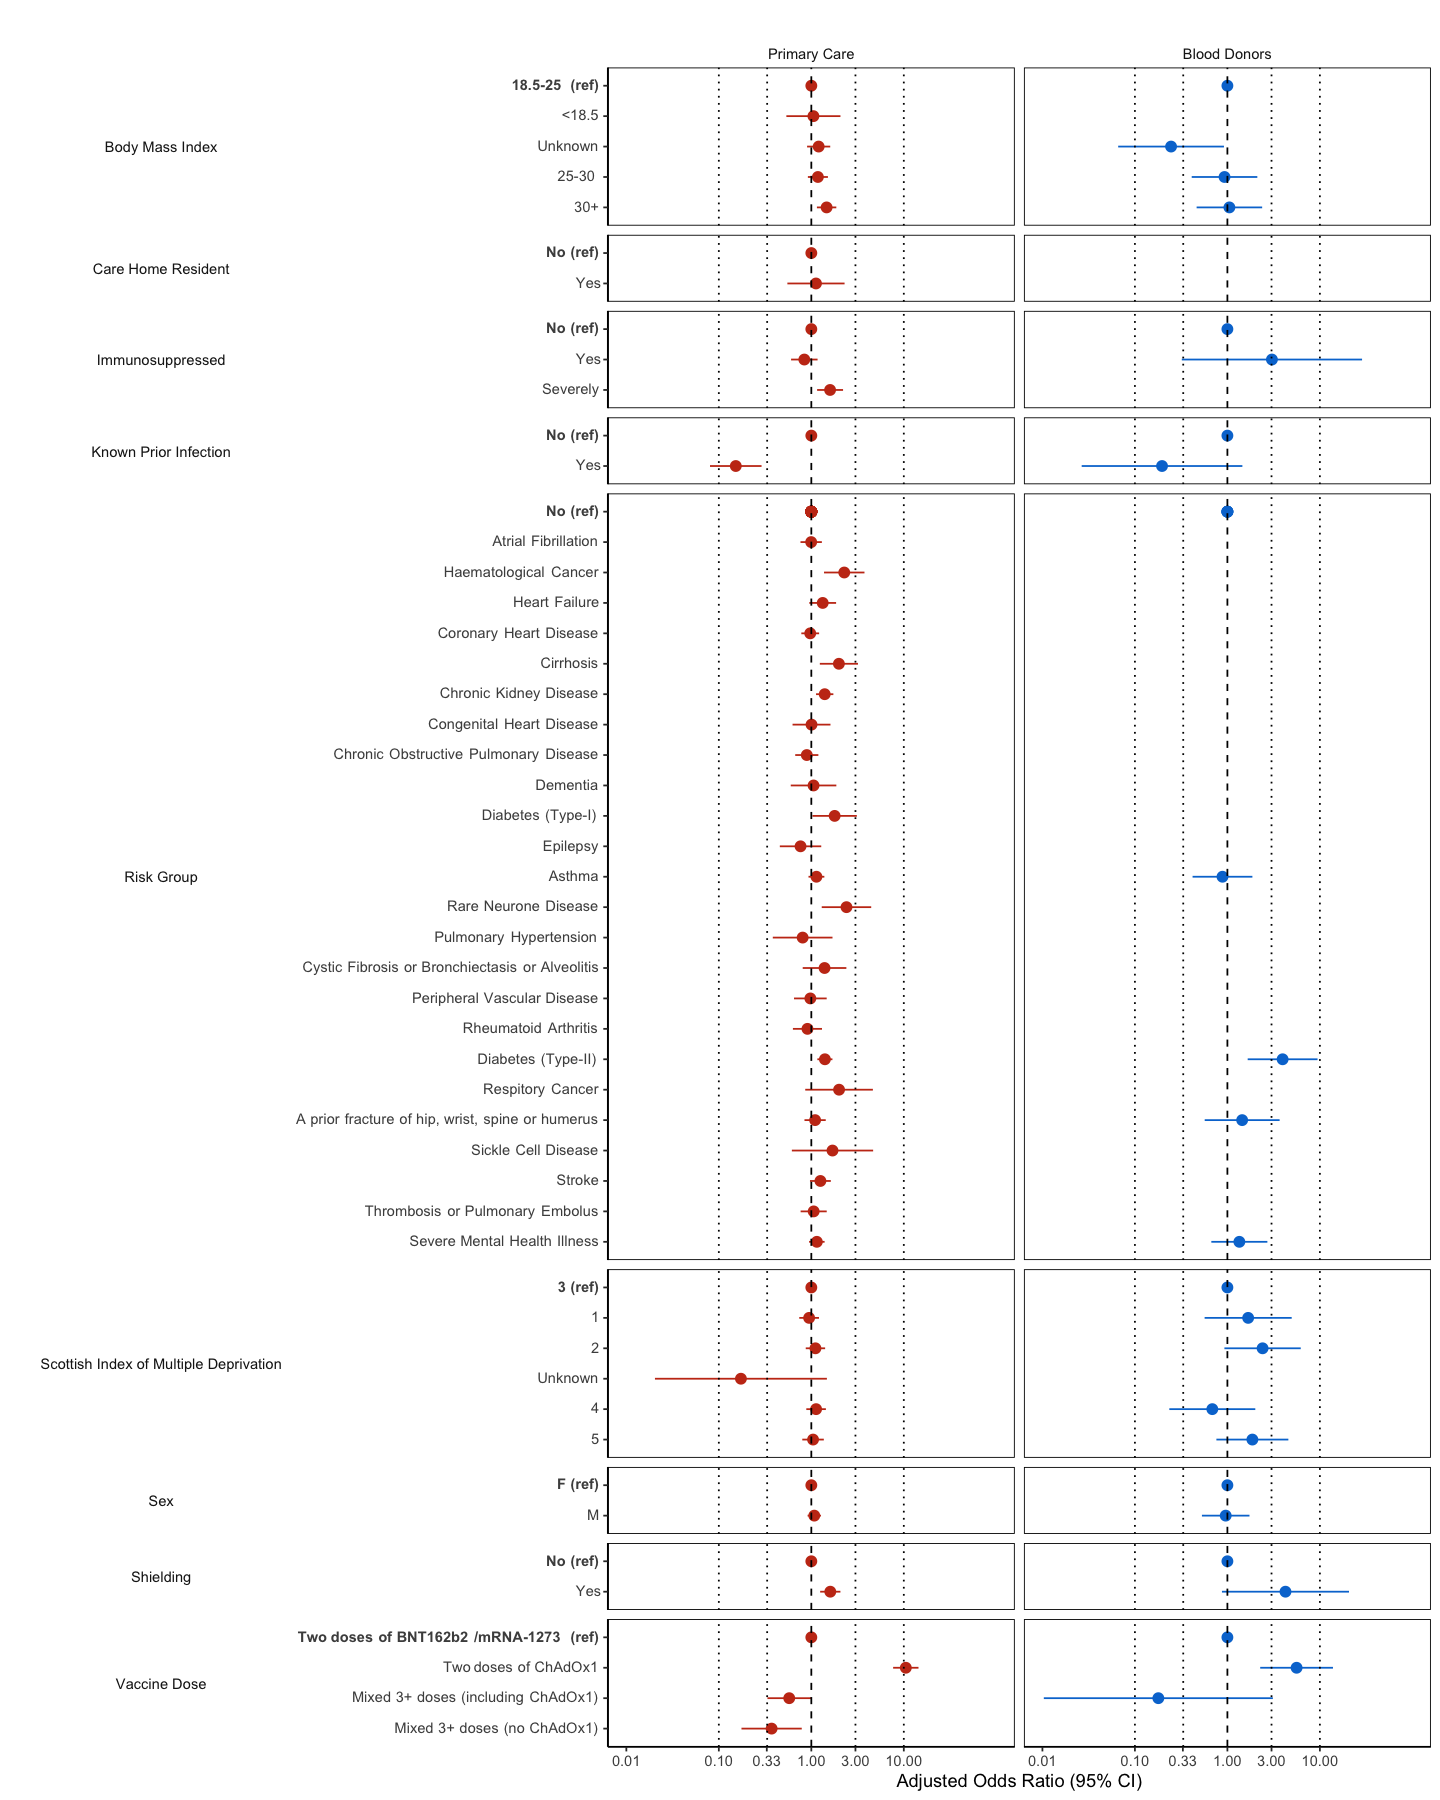

In [25]:
options(repr.plot.width=12, repr.plot.height=15)
p.modelB.ORs <- eavehelpers::plot_ratios(modelB.ORs2,
                                          fill=cohort,
                                          facet=as.factor(label) ~ fct_rev(as.factor(cohort)),
                                          xtitle='Adjusted Odds Ratio (95% CI)',
                                        ) 
ggsave("modelB_ORs.pdf", p.modelB.ORs , width=12, height=15, dpi=300, units="in")
p.modelB.ORs

In [10]:
write.csv(eavehelpers::get_ratios_table(modelB.ORs %>% 
                                         mutate(
                                               level=ifelse(grepl("Q_DIAG",names) & level=='Yes',label,level),
                                               label=ifelse(grepl("Q_DIAG",names),'Risk Group',label)
                                             ) %>% 
                                        filter(cohort=='Primary Care')),'test.csv')

Warning message in geom_pointrange(aes(y = Nominal, ymin = LCL, ymax = UCL, fill = !!sym(fill_var), :
“Ignoring unknown parameters: `width`”


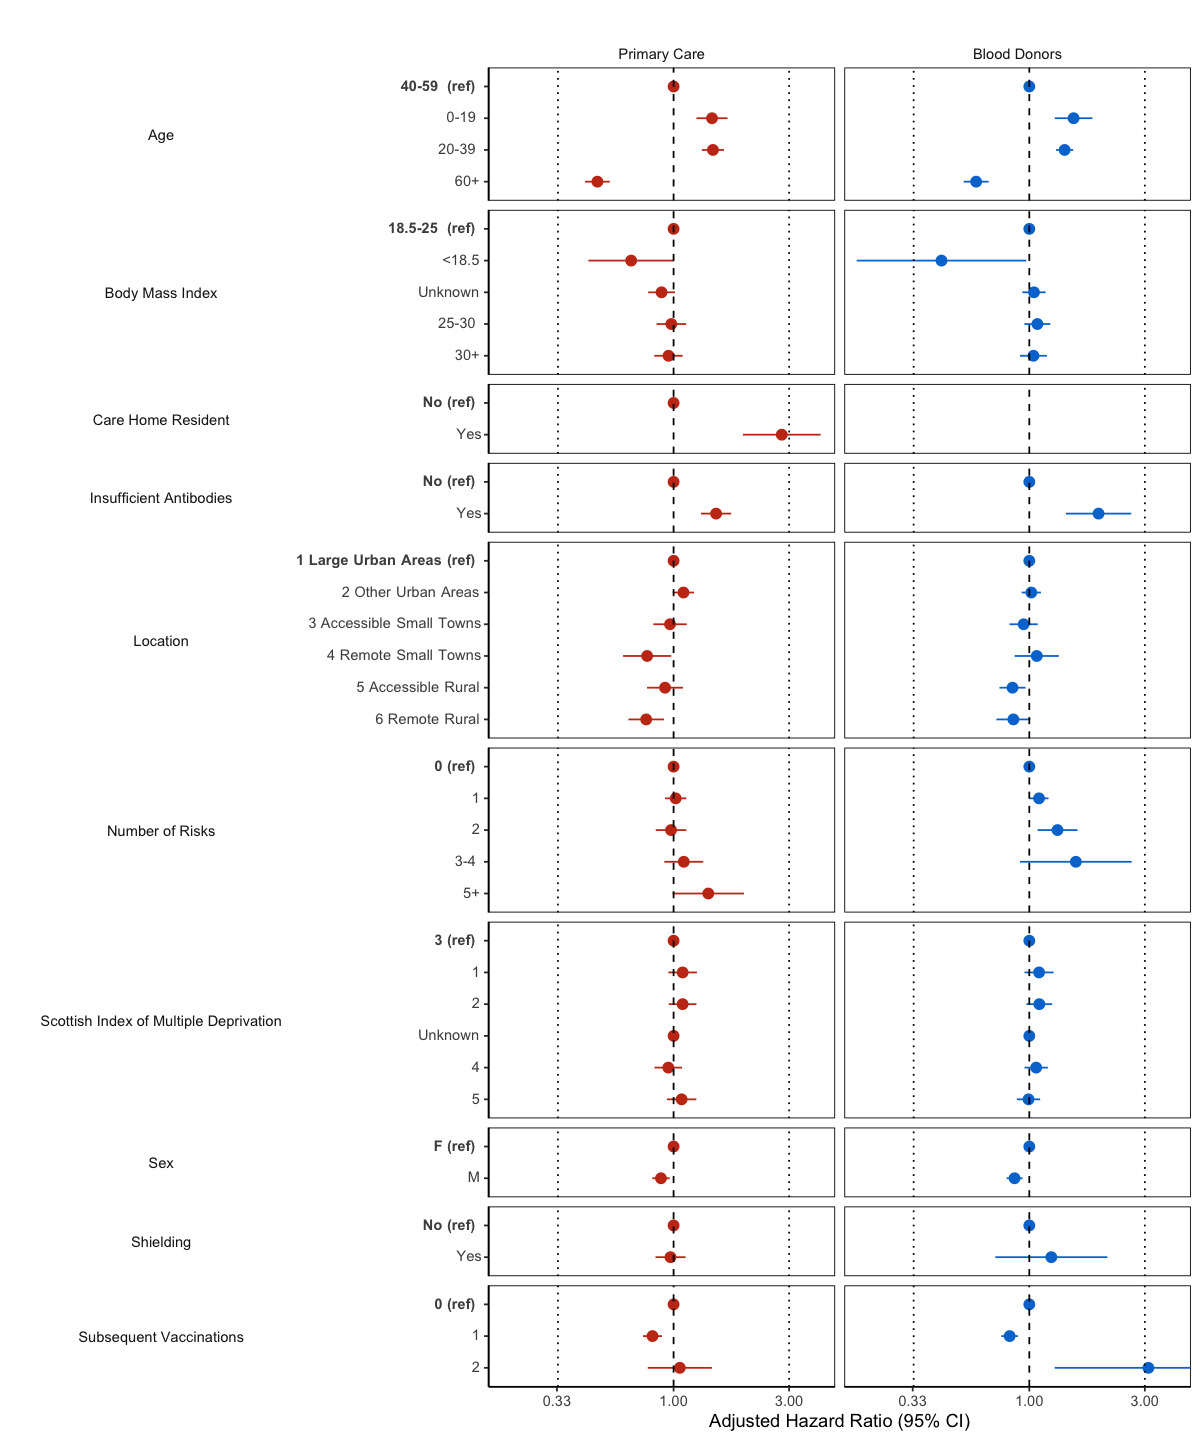

In [11]:
modelC.pc.HRs <- readRDS("results/2DOSE/modelC_pc_cox_HR.rds")
modelC.pc.HRs <- modelC.pc.HRs %>% mutate(level = case_when(
                                    var=='n_risk_gps' & level=='3' ~ '3-4',
                                    var=='n_risk_gps' & level=='4' ~ '5+',
                                    TRUE ~ level))

modelC.bd.HRs <- readRDS("results/2DOSE/modelC_bd_cox_HR.rds")
modelC.bd.HRs <- modelC.bd.HRs %>% mutate(level = case_when(
                                    var=='n_risk_gps' & level=='3' ~ '3-4',
                                    var=='n_risk_gps' & level=='4' ~ '5+',
                                    TRUE ~ level))

modelC.HRs <- modelC.pc.HRs %>% mutate(cohort='Primary Care') %>% 
              rbind(modelC.bd.HRs %>% mutate(cohort='Blood Donors')) %>%
              mutate(label=name,Nominal=estimate,LCL=conf.low,UCL=conf.high) %>% 
              mutate(label = gsub("Blood","Haematological",label))

options(repr.plot.width=10, repr.plot.height=12)
p.modelC.HRs <- eavehelpers::plot_ratios(modelC.HRs,
                                         xmin=0.2,xmax=4,
                                         fill=cohort,
                                         xtitle='Adjusted Hazard Ratio (95% CI)',
                                         facet=as.factor(label) ~ fct_rev(as.factor(cohort))
                                          ) 
ggsave("modelC_HRs.pdf", p.modelC.HRs , width=12, height=15, dpi=300, units="in")
p.modelC.HRs

In [13]:
modelD.pc.HRs <- readRDS("results/2DOSE/modelD_cox_HR.rds") 

modelE.pc.HRs <- readRDS("results/2DOSE/modelE_cox_HR.rds")%>%
                 mutate(name=ifelse(name=='igg','IgG Titre',name)) 


modelDE.HRs <- modelD.pc.HRs %>% mutate(model='Model D') %>% 
              rbind(modelE.pc.HRs %>% mutate(model='Model E')) %>%
              mutate(label=name,Nominal=estimate,LCL=conf.low,UCL=conf.high) %>% 
              mutate(label = factor(label,levels=c('Insufficient Antibodies','IgG Titre','Number of Risks','Blood Cancer','Chronic Kidney Disease','Coronary Heart Disease ','Pulmonary Hypertension','Other Risks','Subsequent Vaccinations','Age','Sex','Body Mass Index'))) %>%
              mutate(label = gsub("Blood","Haematological",label))


In [14]:
modelDE.HRs

var,level,estimate,conf.low,conf.high,pos,name,model,label,Nominal,LCL,UCL
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
insufficient_response,<b>No (ref) </b>,1.0000000,1.00000000,1.0000000,1,Insufficient Antibodies,Model D,Insufficient Antibodies,1.0000000,1.00000000,1.0000000
insufficient_response,Yes,3.6766352,2.27714353,5.9362294,2,Insufficient Antibodies,Model D,Insufficient Antibodies,3.6766352,2.27714353,5.9362294
additional,<b>0 (ref) </b>,1.0000000,1.00000000,1.0000000,1,Subsequent Vaccinations,Model D,Subsequent Vaccinations,1.0000000,1.00000000,1.0000000
additional,1,0.4093418,0.24612185,0.6808039,2,Subsequent Vaccinations,Model D,Subsequent Vaccinations,0.4093418,0.24612185,0.6808039
additional,2,0.4584479,0.14594137,1.4401293,3,Subsequent Vaccinations,Model D,Subsequent Vaccinations,0.4584479,0.14594137,1.4401293
n_risk_gps,<b>0 (ref) </b>,1.0000000,1.00000000,1.0000000,1,Number of Risks,Model D,Number of Risks,1.0000000,1.00000000,1.0000000
n_risk_gps,1,1.6641812,0.81855622,3.3833949,2,Number of Risks,Model D,Number of Risks,1.6641812,0.81855622,3.3833949
n_risk_gps,2,3.1367331,1.53170191,6.4236352,3,Number of Risks,Model D,Number of Risks,3.1367331,1.53170191,6.4236352
n_risk_gps,3-4,5.2441355,2.64140853,10.4114743,4,Number of Risks,Model D,Number of Risks,5.2441355,2.64140853,10.4114743


Warning message in geom_pointrange(aes(y = Nominal, ymin = LCL, ymax = UCL, fill = !!sym(fill_var), :
“Ignoring unknown parameters: `width`”


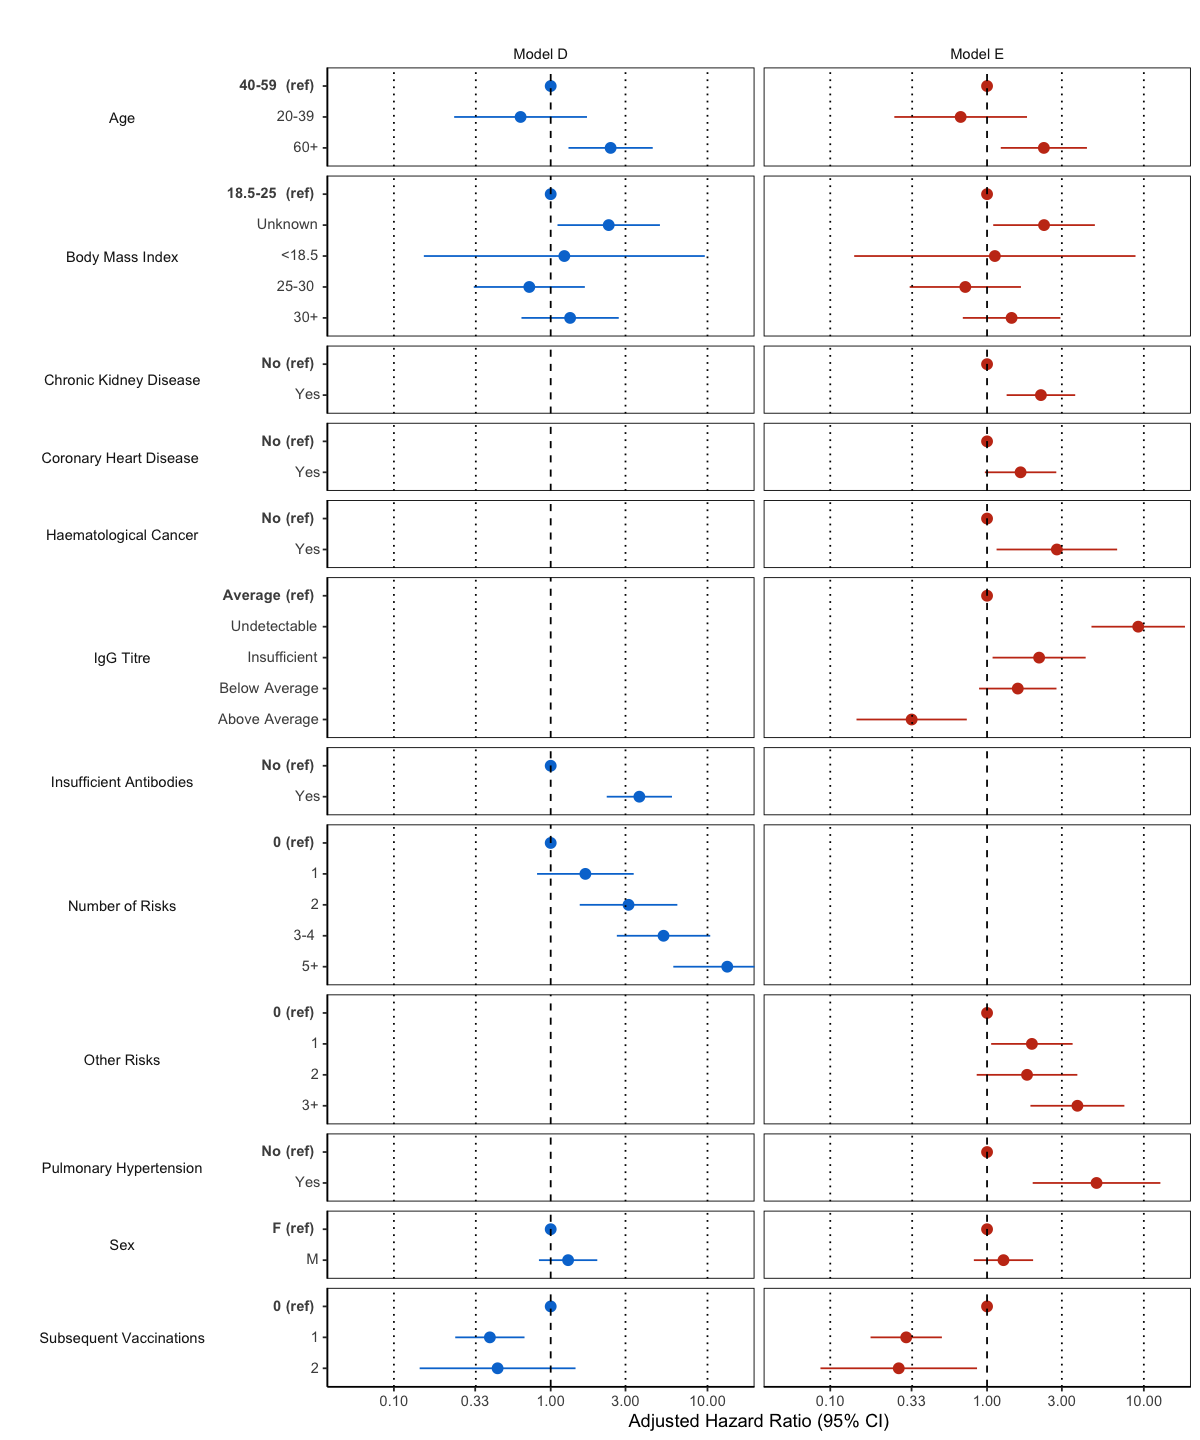

In [15]:
options(repr.plot.width=10, repr.plot.height=12)
p.modelDE.HRs <- eavehelpers::plot_ratios(modelDE.HRs,
                                         xmin=0.05,xmax=15,
                                         fill=model,
                                         xtitle='Adjusted Hazard Ratio (95% CI)',
                                         facet=as.factor(label) ~ as.factor(model)
                                          ) 
ggsave("modelDE_HRs.pdf", p.modelDE.HRs , width=12, height=15, dpi=300, units="in")
p.modelDE.HRs